In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
model = unet_planck()

In [11]:
batch_size = 20
min_rad = 0.08

In [12]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, 4, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


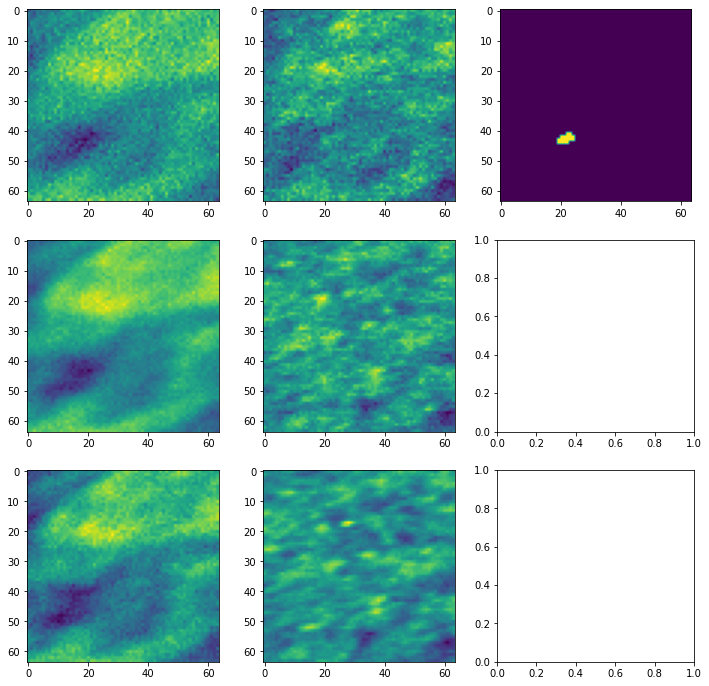

In [13]:
check_gen(test_gen)

In [14]:
filepath='/home/rt2122/Models/planck_z/model.ep{epoch:02d}-vl{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [15]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=10, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=0)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9669 - iou: 0.0021 - dice: 0.0043 
Epoch 00001: val_loss improved from inf to 0.06456, saving model to /home/rt2122/Models/planck_z/model.ep01-vl0.06.h5
20/20 [==============================] - 230s 12s/step - loss: 0.1966 - accuracy: 0.9669 - iou: 0.0021 - dice: 0.0043 - val_loss: 0.0646 - val_accuracy: 0.9956 - val_iou: 0.0015 - val_dice: 0.0032
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9953 - iou: 0.0088 - dice: 0.0177
Epoch 00002: val_loss did not improve from 0.06456
20/20 [==============================] - 188s 9s/step - loss: 0.0639 - accuracy: 0.9953 - iou: 0.0088 - dice: 0.0177 - val_loss: 0.0952 - val_accuracy: 0.9960 - val_iou: 0.0045 - val_dice: 0.0090
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9953 - iou: 0.0119 - dice: 0.0238
Epoch 00003: val_loss did not improve from 0.06456
20/20 [==========

(1, 64, 64, 6) (1, 64, 64, 1)


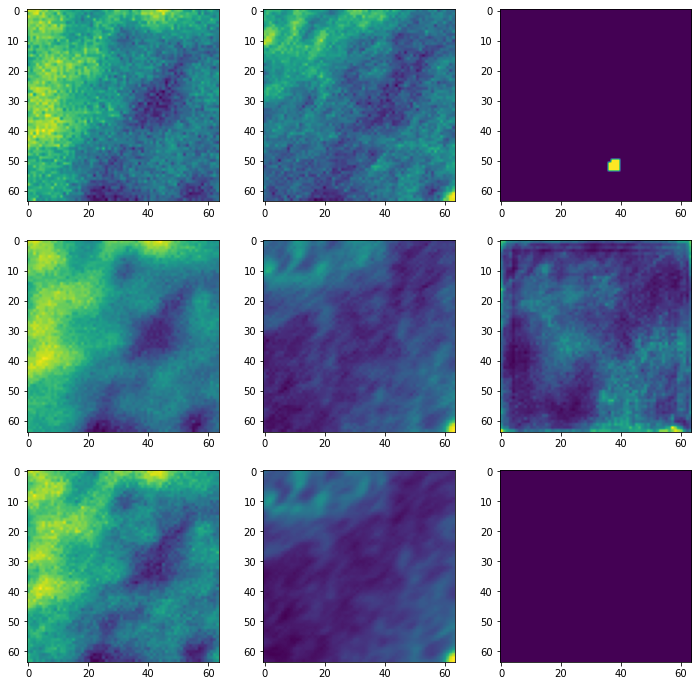

In [16]:
check_gen(test_gen, model)

In [ ]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=50, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=10)

Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9953 - iou: 0.0239 - dice: 0.0479
Epoch 00011: val_loss did not improve from 0.06456
20/20 [==============================] - 159s 8s/step - loss: 0.0343 - accuracy: 0.9953 - iou: 0.0239 - dice: 0.0479 - val_loss: 0.1261 - val_accuracy: 0.9886 - val_iou: 0.0022 - val_dice: 0.0044
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 0.0334 - accuracy: 0.9953 - iou: 0.0273 - dice: 0.0547
Epoch 00012: val_loss did not improve from 0.06456
20/20 [==============================] - 186s 9s/step - loss: 0.0334 - accuracy: 0.9953 - iou: 0.0273 - dice: 0.0547 - val_loss: 0.1623 - val_accuracy: 0.9899 - val_iou: 0.0031 - val_dice: 0.0063
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9954 - iou: 0.0293 - dice: 0.0588
Epoch 00013: val_loss did not improve from 0.06456
20/20 [==============================] - 168s 8s/step - loss: 0.0309 - accuracy: 0.

In [ ]:
check_gen(test_gen, model)

In [ ]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=100, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=50)

In [ ]:
check_gen(test_gen, model)